In [4]:
import pandas as pd
import numpy as np
import matplotlib


In [11]:
df1 = pd.DataFrame({"A": [0,1,2,3], "B": [2,3,4,5]})
df2 = pd.DataFrame({"A": [5,6,7,8], "B": [9,10,11,12]})
print("Vertical")
result_vertical = pd.concat([df1, df2])
print(result_vertical.reset_index(drop=True))

print("Horizontal")
result_horizontal = pd.concat([df1, df2], axis =1)
print(result_horizontal)

Vertical
   A   B
0  0   2
1  1   3
2  2   4
3  3   5
4  5   9
5  6  10
6  7  11
7  8  12
Horizontal
   A  B  A   B
0  0  2  5   9
1  1  3  6  10
2  2  4  7  11
3  3  5  8  12


In [25]:
df1 = pd.DataFrame({
    "conectare": ["K0", "K1", "K2", "C3", "C4"],
    "d": ["D0", "D1", "D2", "D3", "D4"]
})

df2 = pd.DataFrame({
    "conectare": ["C0", "C1", "C2", "C3", "C4"],
    "b": ["B0", "B1", "B2", "B3", "B4"]
})

print(df1)
print(df2)

  conectare   d
0        K0  D0
1        K1  D1
2        K2  D2
3        C3  D3
4        C4  D4
  conectare   b
0        C0  B0
1        C1  B1
2        C2  B2
3        C3  B3
4        C4  B4


In [26]:
result_inner = pd.merge(df1, df2, on="conectare", how="inner")
print(result_inner)

  conectare   d   b
0        C3  D3  B3
1        C4  D4  B4


In [27]:
result_outter = pd.merge(df1, df2, on="conectare", how="outer")
result_outter

,conectare,d,b
0,C0,NaN,B0
1,C1,NaN,B1
2,C2,NaN,B2
3,C3,D3,B3
4,C4,D4,B4
5,K0,D0,NaN
6,K1,D1,NaN
7,K2,D2,NaN


In [28]:
result_right = pd.merge(df1, df2, on="conectare", how="right")
result_right

,conectare,d,b
0,C0,NaN,B0
1,C1,NaN,B1
2,C2,NaN,B2
3,C3,D3,B3
4,C4,D4,B4


In [29]:
result_left = pd.merge(df1, df2, on="conectare", how="left")
result_left

,conectare,d,b
0,K0,D0,NaN
1,K1,D1,NaN
2,K2,D2,NaN
3,C3,D3,B3
4,C4,D4,B4


In [35]:
df1 = pd.DataFrame({
    "ceva": ["K0", "K1", "K2", "C3", "C4"],
}, index = ["B0", "B2", "B10", "B4", "B9"])

df2 = pd.DataFrame({
    "altcevaceva": ["C0", "C1", "C2", "C3", "C4"]
}, index = ["B1", "B2", "B3", "B4", "B9"])

print(df1)
print(df2)

    ceva
B0    K0
B2    K1
B10   K2
B4    C3
B9    C4
   altcevaceva
B1          C0
B2          C1
B3          C2
B4          C3
B9          C4


In [37]:
result = df1.join(df2, how="outer")
result

,ceva,altcevaceva
B0,K0,NaN
B1,NaN,C0
B10,K2,NaN
B2,K1,C1
B3,NaN,C2
B4,C3,C3
B9,C4,C4


In [39]:
result = df1.join(df2, how="inner")
result

,ceva,altcevaceva
B2,K1,C1
B4,C3,C3
B9,C4,C4


In [45]:
df1 = pd.DataFrame({
    "keys": ["el", "ea", "el", "ea", "ea"],
    "values": [2,3,4,5,6]})

grouping = df1.groupby("keys")
print(grouping.sum())
print(grouping.mean())
print(grouping.agg(["mean","median", "sum"]))

      values
keys        
ea        14
el         6
        values
keys          
ea    4.666667
el    3.000000
        values           
          mean median sum
keys                     
ea    4.666667    5.0  14
el    3.000000    3.0   6


In [60]:
df = pd.DataFrame({
    'Ceva':["foo", "bar", "foo", "bar"],
    "Size": ["small", "large", "small", "large"],
    "Quantity": ["one", "one", "four", "one"],
    "Number":[1,2,3,4]
})

print(df)

  Ceva   Size Quantity  Number
0  foo  small      one       1
1  bar  large      one       2
2  foo  small     four       3
3  bar  large      one       4


In [61]:
df.pivot_table(values="Number", index=["Ceva", "Quantity"], columns=["Size"], aggfunc="sum")

Size           large  small
Ceva Quantity              
bar  one         6.0    NaN
foo  four        NaN    3.0
     one         NaN    1.0

In [67]:
df_users = pd.DataFrame({
    "Platform": ["Twitter", "Youtube", "Instagran", "Twitter", "Facebook","Pinterest"],
    "Gender": ["Male", "Female", "Male", "Male", "Female", "Male"]
})

result = pd.crosstab(df_users["Platform"], df_users["Gender"])
result

Gender,Female,Male
Platform,,
Facebook,1,0
Instagran,0,1
Pinterest,0,1
Twitter,0,2
Youtube,1,0


In [90]:
df = pd.DataFrame({
    'Ceva':["foo", "bar", "foo", "bar"],
    "Quantity": ["one", "one", "four", "one"],
    "Number":[1,2,3,4]
})

df.set_index(["Ceva", 'Quantity'], inplace=True)
df

,,Number
Ceva,Quantity,
foo,one,1
bar,one,2
foo,four,3
bar,one,4


In [91]:
df_test = df.stack()
print(df_test)
print(df_test.index)
print(df_test.values)



Ceva  Quantity        
foo   one       Number    1
bar   one       Number    2
foo   four      Number    3
bar   one       Number    4
dtype: int64
MultiIndex([('foo',  'one', 'Number'),
            ('bar',  'one', 'Number'),
            ('foo', 'four', 'Number'),
            ('bar',  'one', 'Number')],
           names=['Ceva', 'Quantity', None])
[1 2 3 4]


In [99]:
df_test=df_test.reset_index()
df_double= df_test.unstack()
print(df_test)
print(df_test.index)
print(df_test.values)



  Ceva Quantity level_2  0
0  foo      one  Number  1
1  bar      one  Number  2
2  foo     four  Number  3
3  bar      one  Number  4
RangeIndex(start=0, stop=4, step=1)
[['foo' 'one' 'Number' 1]
 ['bar' 'one' 'Number' 2]
 ['foo' 'four' 'Number' 3]
 ['bar' 'one' 'Number' 4]]


In [101]:
note = pd.DataFrame({
    "Student": ["Ion", "Vasile", "Anton"],
    "Mate": [10, 9,4],
    "Fizica": [5,2,9]
})

note

,Student,Mate,Fizica
0,Ion,10,5
1,Vasile,9,2
2,Anton,4,9


In [108]:
pd.melt(note, id_vars=["Student"], value_vars=["Mate", "Fizica"], var_name="Subiect", value_name="Note")

,Student,Subiect,Note
0,Ion,Mate,10
1,Vasile,Mate,9
2,Anton,Mate,4
3,Ion,Fizica,5
4,Vasile,Fizica,2
5,Anton,Fizica,9


In [117]:
time = pd.DataFrame({
    "date": ["2023-01-01","2023-02-01", "2023-03-01", "2023-04-01", "2023-05-01", "2023-06-01", "2023-07-01"],
    "values":[1,2,3,4,5,6,7]
})

time["date"] = pd.to_datetime(time["date"])
time

,date,values
0,2023-01-01,1
1,2023-02-01,2
2,2023-03-01,3
3,2023-04-01,4
4,2023-05-01,5
5,2023-06-01,6
6,2023-07-01,7


In [114]:
print(time["date"].iloc[2])
print(time["date"].iloc[1])
print(time["date"].iloc[2]-time["date"].iloc[1])

2023-03-01 00:00:00
2023-02-01 00:00:00
28 days 00:00:00


In [118]:
time.set_index("date", inplace=True, drop=True)
time.loc["2023-02-01"]

values    2
Name: 2023-02-01 00:00:00, dtype: int64

In [126]:
time.rolling(window=2).sum()

,values
date,
2023-01-01,NaN
2023-02-01,3.0
2023-03-01,5.0
2023-04-01,7.0
2023-05-01,9.0
2023-06-01,11.0
2023-07-01,13.0


In [127]:
time.resample("3ME").sum()

,values
date,
2023-01-31,1
2023-04-30,9
2023-07-31,18


<Axes: xlabel='Mate', ylabel='Fizica'>

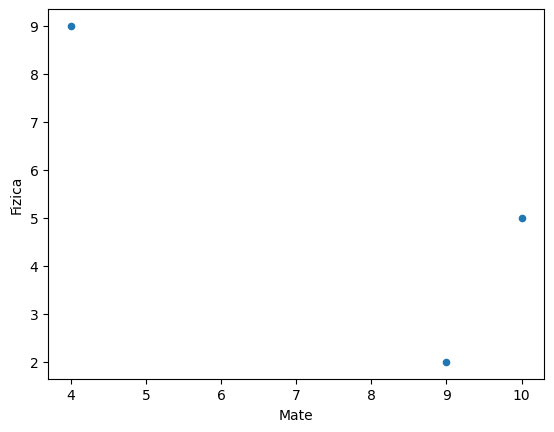

In [128]:
note.plot(kind="scatter", x="Mate", y="Fizica")